**checks the data types of each column and applies appropriate transformations accordingly**

In [124]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [125]:
def preprocess_data(data):
    # Separate the features (X) and the target variable (y)
    X = data.drop('gender', axis=1)
    y = data['gender']

    # Handle NaN or 0 values in numeric columns
    numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
    X[numeric_cols] = X[numeric_cols].replace(0, np.nan)
    imputer = SimpleImputer(strategy='mean')
    X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

    # Convert text data to numeric representations
    text_cols = X.select_dtypes(include=['object']).columns
    for col in text_cols:
        label_encoder = LabelEncoder()
        X[col] = label_encoder.fit_transform(X[col])

    return X, y




In [126]:
def encode_text_column_using_label_encoding(df, column_name):
    """
    Encode a text column in a dataframe using label encoding.
    
    Parameters:
    df (pandas dataframe): The dataframe to encode
    column_name (str): The name of the text column to encode
    
    Returns:
    pandas dataframe: The updated dataframe with the encoded column
    """
    # Create a LabelEncoder object
    le = LabelEncoder()
    
    # Encode the column using label encoding
    encoded = le.fit_transform(df[column_name])
    
    # Replace the original column with the encoded values
    df[column_name] = encoded
    
    # Return the updated dataframe
    return df


In [127]:
# Read the data from the CSV file
data = pd.read_csv('gender_classification_v7.csv')
column_names = data.columns.tolist()
print(column_names)

['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender']


In [128]:
data = encode_text_column_using_label_encoding(data, "gender")

In [129]:
X, y = preprocess_data(data)

In [130]:
# Split the data into training and testing sets
train_size = 0.8 # Training set size (80%)
train_samples = int(len(X) * train_size)

X_train = X[:train_samples]
y_train = y[:train_samples]
X_test = X[train_samples:]
y_test = y[train_samples:]

In [131]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 21)}  # Range of K values to try

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)  # Adjust the number of folds (cv) as desired
grid_search.fit(X_train, y_train)

# Get the best K value
best_k = grid_search.best_params_['n_neighbors']
print("Best K:", best_k)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best K: 16
Accuracy: 0.7472527472527473


In [132]:
# Create the KNN classifier
k = 16 # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)




Accuracy: 0.7472527472527473
Confusion Matrix:
[[466  40]
 [213 282]]


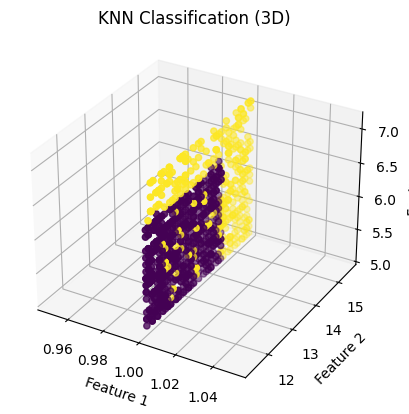

In [142]:
# Create a 3D scatter plot for three features
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract the values for plotting
x1 = X_test.iloc[:, 0]
x2 = X_test.iloc[:, 1]
x3 = X_test.iloc[:, 2]


# Convert y_pred to integer type
y_pred_int = y_pred.astype(int)

# Plot the data points
ax.scatter(x1, x2, x3, c=y_pred_int, cmap='viridis')

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("KNN Classification (3D)")

plt.show()
